<AxesSubplot: xlabel='sex', ylabel='count'>

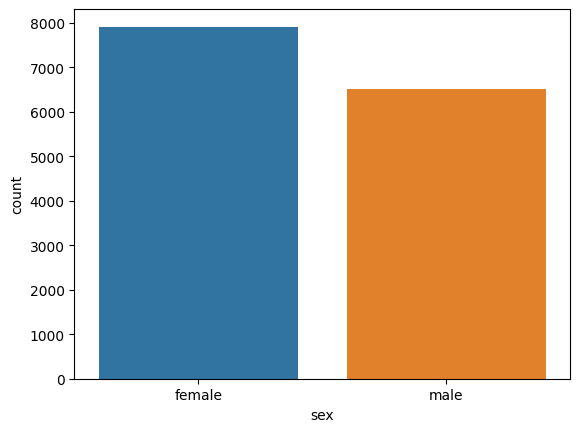

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)

welfare['sex'].dtypes
welfare['sex'].value_counts()

welfare['sex']=np.where(welfare['sex']==9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

welfare['sex']=np.where(welfare['sex']==1, 'male', 'female')
welfare['sex'].value_counts()
sns.countplot(data=welfare, x='sex')

<AxesSubplot: xlabel='sex', ylabel='income_mean'>

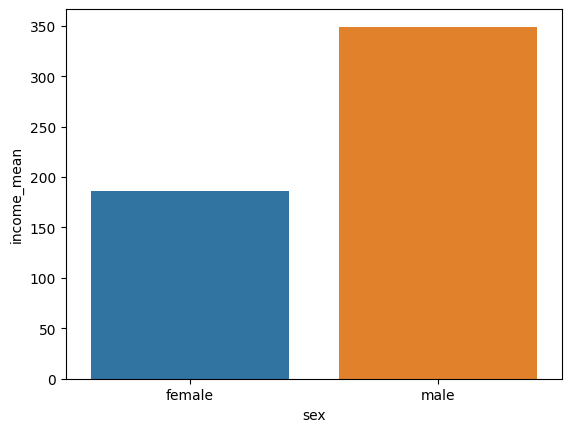

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)
welfare['sex']=np.where(welfare['sex']==9, np.nan, welfare['sex'])
welfare['sex']=np.where(welfare['sex']==1, 'male', 'female')

#이상치 결측 처리
welfare['income']=np.where(welfare['income']==9999, np.nan,welfare['income'])
income_sex=welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(income_mean=('income','mean'))
sns.barplot(data=income_sex, x='sex', y='income_mean')


<AxesSubplot: xlabel='age', ylabel='income_mean'>

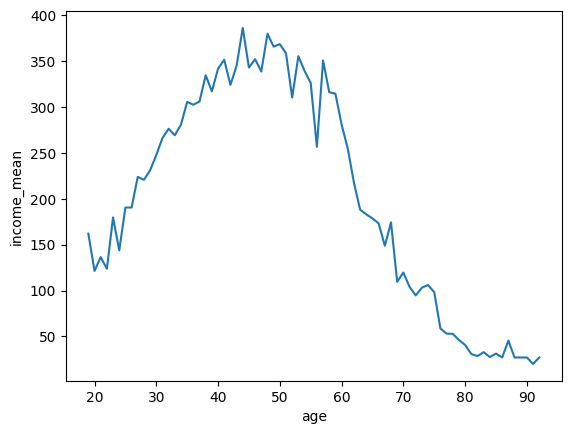

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)

welfare['birth']=np.where(welfare['birth']==9999, np.nan, welfare['birth'])
welfare=welfare.assign(age=2019-welfare['birth']+1)
income_age = welfare.dropna(subset=['income']).groupby('age').agg(income_mean=('income','mean'))
sns.lineplot(data=income_age, x='age', y='income_mean')

<AxesSubplot: xlabel='age2', ylabel='income_mean'>

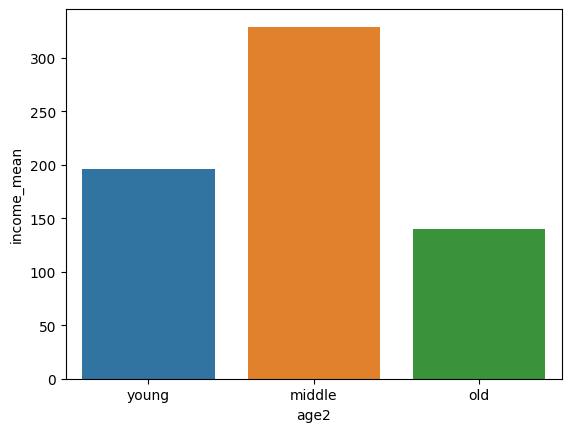

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)
welfare['birth']=np.where(welfare['birth']==9999, np.nan, welfare['birth'])
welfare=welfare.assign(age=2019-welfare['birth']+1)
welfare = welfare.assign(age2 = np.where(welfare['age']<30, 'young',
                                         np.where(welfare['age']<=59, 'middle',
                                                  'old')))
income_age2 = welfare.dropna(subset=['income']).groupby('age2', as_index=False).agg(income_mean=('income','mean'))
sns.barplot(data=income_age2, x='age2', y='income_mean', order=['young','middle','old'])

<AxesSubplot: xlabel='age2', ylabel='income_mean'>

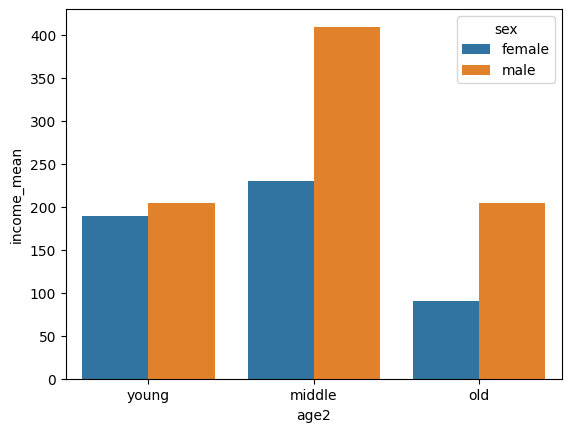

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)
welfare['sex']=np.where(welfare['sex']==9, np.nan, welfare['sex'])
welfare['sex']=np.where(welfare['sex']==1, 'male', 'female')
welfare['birth']=np.where(welfare['birth']==9999, np.nan, welfare['birth'])
welfare=welfare.assign(age=2019-welfare['birth']+1)
welfare = welfare.assign(age2 = np.where(welfare['age']<30, 'young',
                                         np.where(welfare['age']<=59, 'middle',
                                                  'old')))

income_sex=welfare.dropna(subset=['income']).groupby(['age2','sex'], as_index=False).agg(income_mean=('income','mean'))
sns.barplot(data=income_sex, x='age2', y='income_mean', hue='sex', 
            order=['young','middle','old'])

<AxesSubplot: xlabel='income_mean', ylabel='job'>

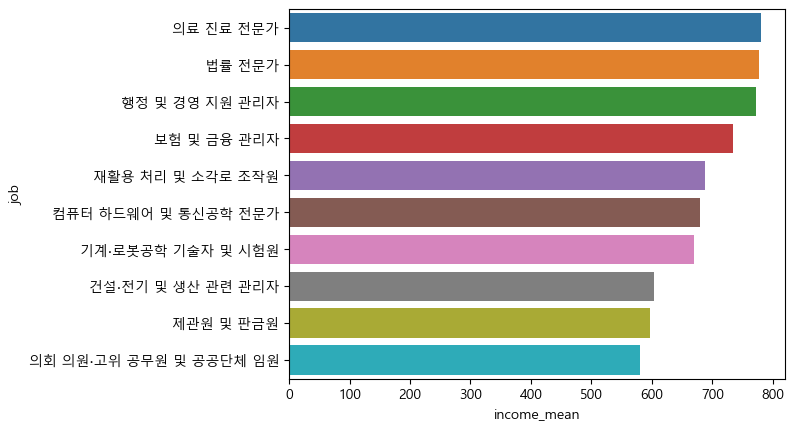

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)

job_list = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
welfare=welfare.merge(job_list, how='left', on='code_job')
income_job = welfare.dropna(subset=['job','income']).groupby('job',as_index=False).agg(income_mean=('income','mean'))
top10 = income_job.sort_values('income_mean',ascending=False).head(10)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Malgun Gothic'})
sns.barplot(data=top10, y='job', x='income_mean')

[(0.0, 500.0)]

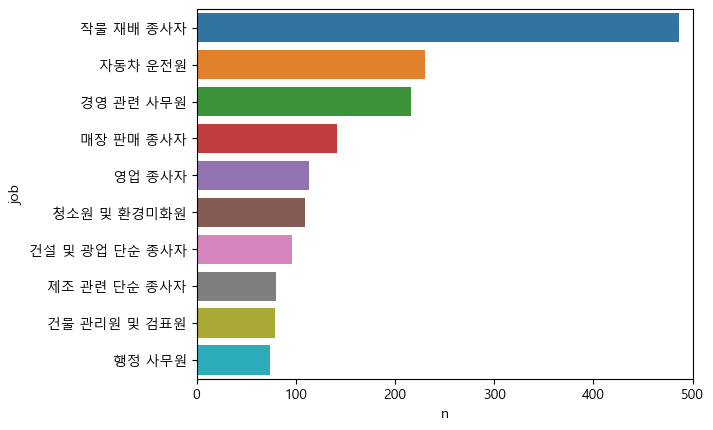

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)
#결측치를 제거한 sex 값 생성
welfare['sex']=np.where(welfare['sex']==9, np.nan, welfare['sex'])
welfare['sex']=np.where(welfare['sex']==1, 'male', 'female')
#직종 코드를 불러온다.
job_list = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
#공통으로 들어있는 값을 code_job을 기준으로 결합
welfare=welfare.merge(job_list, how='left', on='code_job')
male_job = welfare.dropna(subset=['job']).query('sex=="male"').groupby('job',as_index=False).agg(n=('job','count')).sort_values('n',ascending=False).head(10)
female_job=welfare.dropna(subset=['job']).query('sex=="female"').groupby('job',as_index=False).agg(n=('job','count')).sort_values('n',ascending=False).head(10)

sns.barplot(data=male_job, y='job', x='n').set(xlim=(0,500))
#sns.barplot(data=female_job, y='job', x='n').set(xlim=(0,500))

<AxesSubplot: xlabel='religion', ylabel='proportion'>

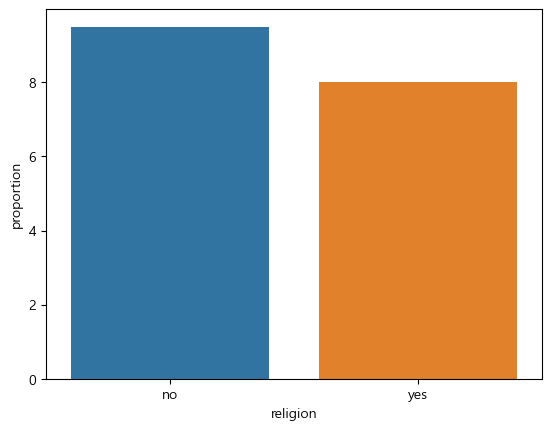

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage_type', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)

welfare['religion']=np.where(welfare['religion']==1, 'yes', 'no')
welfare['marriage']=np.where(welfare['marriage_type']==1,'marriage',
                             np.where(welfare['marriage_type']==3, 'divorce',
                             'etc'))
div_rel = welfare.query('marriage!="etc"').groupby('religion', as_index=False)['marriage'].value_counts(normalize=True)
div_rel = div_rel.query('marriage=="divorce"').assign(proportion=div_rel['proportion']*100).round(1)
sns.barplot(data=div_rel, x="religion", y='proportion')

<AxesSubplot: ylabel='region'>

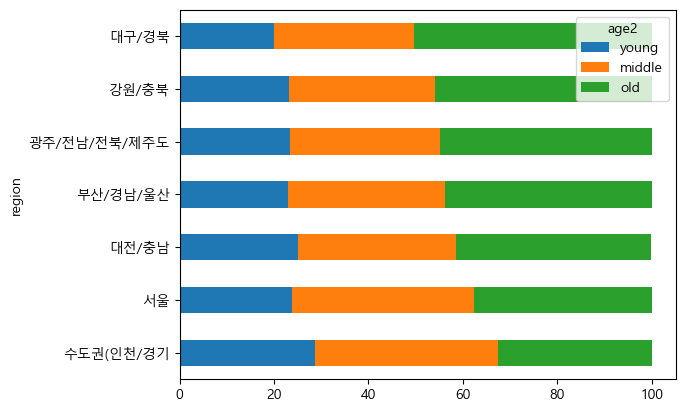

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
#데이터 가져오기
raw = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
#복사본 생성
welfare = raw.copy()
welfare = welfare.rename(
    columns= {'h14_g3':'sex', #성별
              'h14_g4': 'birth', #출생년도
              'h14_g10' : 'marriage_type', #혼인 여부
              'h14_g11' : 'religion', #종교
              'p1402_8aq1' : 'income', #월급
              'h14_eco9' : 'code_job', #직업 코드
              'h14_reg7' : 'code_region'} #지역 코드
)
#결측치를 제거한 age 값 생성
welfare['birth']=np.where(welfare['birth']==9999, np.nan, welfare['birth'])
welfare=welfare.assign(age=2019-welfare['birth']+1)
#30미만, 59이하, 59이상으로 나이를 나눔
welfare = welfare.assign(age2 = np.where(welfare['age']<30, 'young',
                                np.where(welfare['age']<=59, 'middle',
                                                  'old')))
region_list = pd.DataFrame({'code_region':[1,2,3,4,5,6,7],
                            'region':['서울','수도권(인천/경기','부산/경남/울산','대구/경북','대전/충남','강원/충북','광주/전남/전북/제주도']}
                        )
welfare=welfare.merge(region_list, how="left", on="code_region")
region_age2=welfare.groupby('region', as_index=False)['age2'].value_counts(normalize=True)
region_age2=region_age2.assign(proportion=region_age2['proportion']*100).round(1)

pivot_df=region_age2[['region','age2','proportion']].pivot(index='region',columns='age2',values='proportion')
reorder_df=pivot_df.sort_values('old')[['young','middle','old']]
reorder_df.plot.barh(stacked=True)
